## Visualize waveforms generated for the AWG

This notebook is used to quickly visualize waveforms that are uploaded to the AWG. Figures generated here can also be saved and used in publication supplementary.

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

"a_ch1" is a null channel.
"a_ch2" is a null channel.
"a_ch3" is a null channel.
"d_ch3" is a null channel.
"d_ch0" is a null channel.
"d_ch1" is a null channel.
"d_ch2" is a null channel.
"d_ch4" is a null channel.
"d_ch5" is a null channel.


<IPython.core.display.Javascript object>


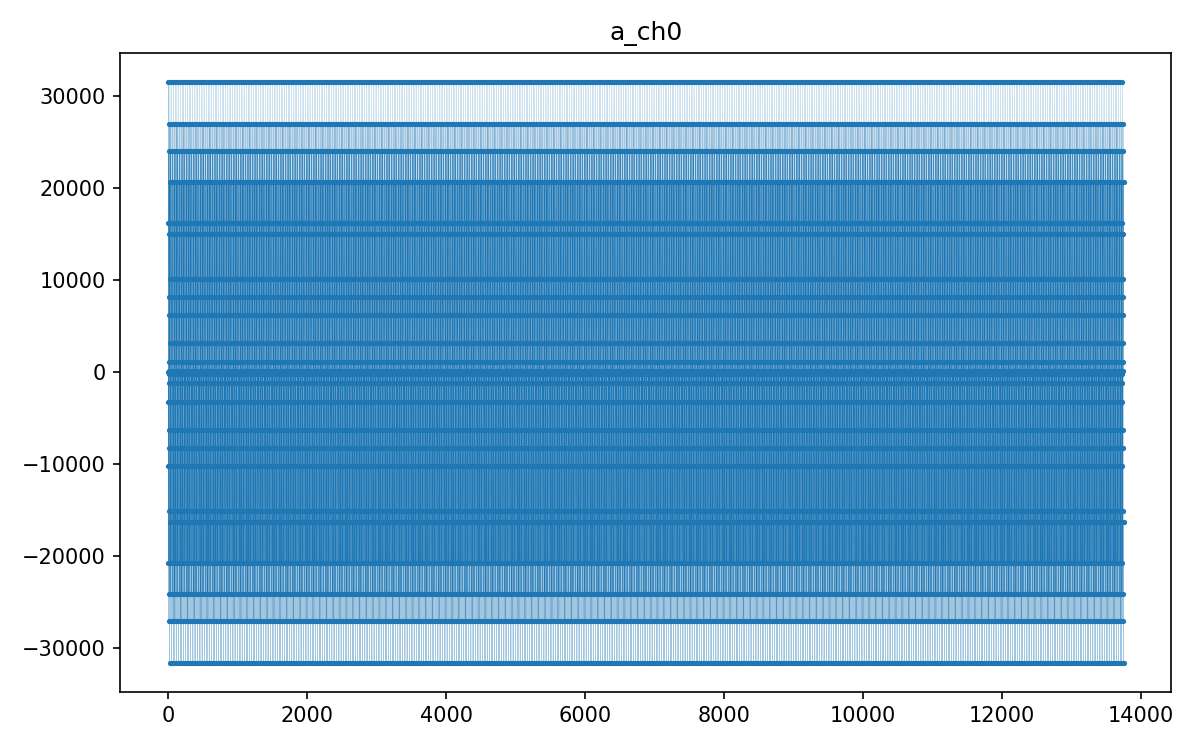

In [19]:
%matplotlib notebook

waveform_name = 'Simesuod' # Enter name of pkl file without channel names

loc = 'C:\\qudi-hira\\saved_pulsed_assets\\waveform\\'
keys = ['a_ch0', 'a_ch1', 'a_ch2', 'a_ch3', 'd_ch3','d_ch0', 'd_ch1', 'd_ch2', 'd_ch3', 'd_ch4', 'd_ch5']
channels = dict.fromkeys(keys, None) # Initialize all channels to None

for key in list(channels):
    try:
        with open(loc + waveform_name + '_' + key + '.pkl', 'rb') as f:
            channels[key] = pickle.load(f)
        if not np.any(channels[key]): # Delete channels with only zeros
            print(f'"{key}" is a null channel.')
            del channels[key]  
    except FileNotFoundError as excep: # Delete channels that don't exist on disk
        print(excep) 
        del channels[key]

        
if len(channels) == 1: # Single channel plotting
    size_x, size_y = 8, 5
else:
    size_x, size_y = len(channels) * 2, len(channels) * 1.5

fig, ax = plt.subplots(nrows=len(channels), sharex=True, figsize=(size_x, size_y))

if not isinstance(ax, np.ndarray): # Correct for matplotlib's (silly) behavior for single plots
    ax = [ax]

for idx, key in enumerate(channels):
    if key.startswith('a_'):
        ax[idx].plot(channels[key], "-", linewidth=0.1, color="C0")
        ax[idx].plot(channels[key], ".", markersize=3, color="C0")
    else:
        ax[idx].plot(channels[key],".", linewidth=0.3, color="C1")
    ax[idx].set_title(f'{key}')

fig.tight_layout()